Sentiment Analysis on Facebook Reviews

In [112]:
# Importing modules and packages.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [113]:
# Loading the dataset.

data= pd.read_csv(r"C:\Users\seren\OneDrive\Desktop\vs\python\facebook_data (2).csv")
data.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,Awsome sound powerful bass battery backup is a...,5


In [114]:
# Checking for null values.

print(data.isnull().sum())


review    0
rating    0
dtype: int64


In [115]:
# Preprocesing and Stemming

import nltk
import re
nltk.download('stopwords')
stemmer= nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopwords=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\seren\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [116]:
# Defining a function to remove punctuations, https, special charecters, whitespace etc.

def clean(text):
  text=str(text).lower()
  text=re.sub('\[.*?\]','',text)
  text=re.sub('https?://\S+|www\.\S+','',text)
  text=re.sub('<.*?>+','',text)
  text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
  text=re.sub('\n','',text)
  text=re.sub('\w*\d\w*','',text)
  text=[word for word in text.split(' ') if word not in stopwords]
  text=" ".join(text)
  text= [stemmer.stem(word) for word in text.split(' ')]
  text=" ".join(text)
  return text

In [117]:
# Applying the funtion on the data set by converting the function into an argument.

data['review']= data['review'].apply(clean)
data.head()

,review,rating
0,nice produt like design lot easi carri look...,5
1,awesom soundveri pretti see nd sound qualiti g...,5
2,awesom sound qualiti pros hrs batteri life in...,4
3,think good product per qualiti also design qui...,5
4,awsom sound power bass batteri backup also exc...,5


In [118]:
# now all the stopwords have been removed from the dataset.

In [119]:
# Taking a look at ratings from Facebook by plotting a pie chart.

ratings= data['rating'].value_counts()
numbers=ratings.index
quantity=ratings.values

import plotly.express as px

figure= px.pie(data,
               values=quantity,
               names=numbers, hole=0.25)
figure.show()

In [ ]:
# From this pie chart we can see
# 57.3% of the people gave 5 start rating
# 29.9% of the people gave 4 start rating
# 8.59% of the people gave 3 start rating
# 1.23% of the people gave 2 start rating
# 3.07% of the people gave 1 start rating

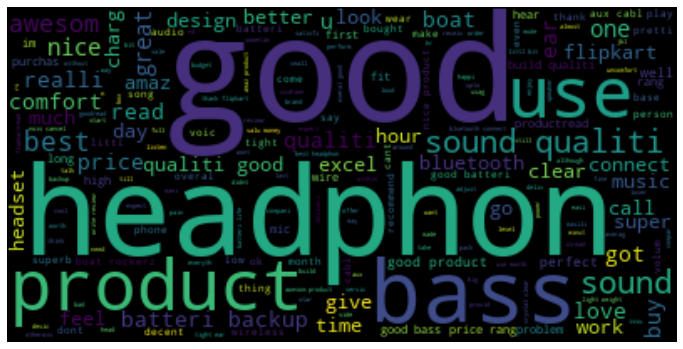

In [120]:
# Looking at the reviews people give.

text= " ".join(i for i in data.review)
stopwords=set(STOPWORDS)
wordcloud= WordCloud(stopwords=stopwords,
                     background_color="black").generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [121]:
# Analysing the sentiments by adding three colums i.e Positive, Neutral and Negative in the dataset.

nltk.download('vader_lexicon')
sentiments= SentimentIntensityAnalyzer()
data["Positive"]=[sentiments.polarity_scores(i)["pos"] for i in data['review']]
data["Negative"]=[sentiments.polarity_scores(i)["neg"] for i in data['review']]
data["Neutral"]=[sentiments.polarity_scores(i)["neu"] for i in data['review']]

data=data[['review','Positive','Negative','Neutral']]
data.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\seren\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,review,Positive,Negative,Neutral
0,nice produt like design lot easi carri look...,0.431,0.000,0.569
1,awesom soundveri pretti see nd sound qualiti g...,0.471,0.000,0.529
2,awesom sound qualiti pros hrs batteri life in...,0.194,0.000,0.806
3,think good product per qualiti also design qui...,0.393,0.049,0.558
4,awsom sound power bass batteri backup also exc...,0.479,0.029,0.492


In [122]:
# Seeing how most of the reviewers think about the products and services of Facebook.
# by taking 3 variables x,y,z and defining a function to tell the majority score we got in sentiment analysis.
# a is sum of Positive; b is sum of Negative; c is sum of Neutral 

x=sum(data["Positive"])
y=sum(data["Negative"])
z=sum(data["Neutral"])

def sentiment_score(a,b,c):
  if (a>b) and (a>c):
    print("Positive")
  elif (b>a) and (b>c):
    print("Negative")
  else:
    print("Neutral")
  
sentiment_score(x,y,z)

Neutral


In [ ]:
# The ranking of the test after preprocessing is neutral.
# The majority of the customers have given neutral reviews.

In [123]:
# Finding the Positive, Negative and Neutral sentiment scores to get a conclusion fot Facebook reviews.

print("Positive: ",x)
print("Negative: ",y)
print("Neutral: ",z)

Positive:  179.51100000000017
Negative:  17.466999999999995
Neutral:  292.02299999999985


In [ ]:
# From here we can see that most of the custoemrs have give neutral reviews about Facebook.
# We can see that most of the customers are satisfied by Facebook as Neutral and Positive have higher sentiment scores.